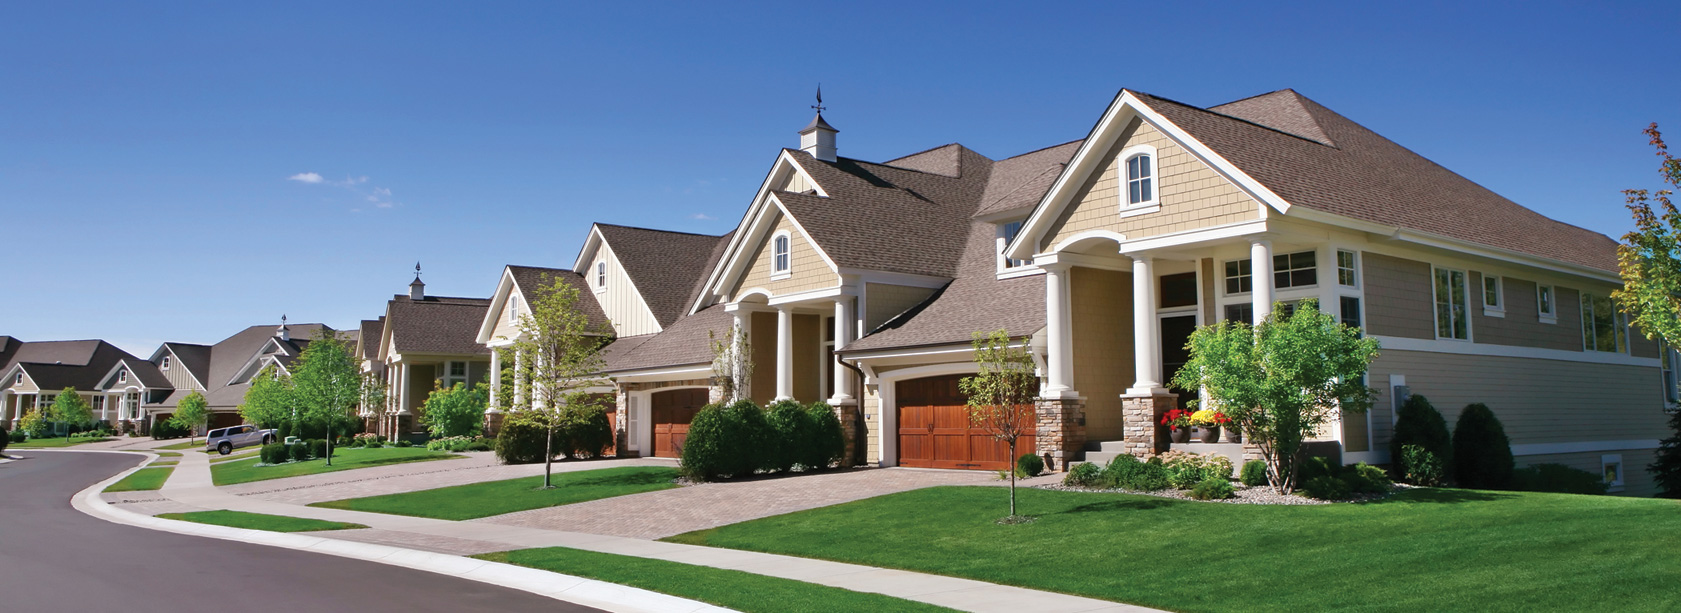

<center>
    
    
 ## Conditioned Rental Predictions - A Case Study project
    
___


<center>

##### Pablo de la Asunción Cumbrera Conde


##### Index


 - Introduction - Case Study
 - The Data Set
 - Analysis Plan
 - Exploratory Data Analysis
 - Exploratory Data Analysis Summary
 - Model Developement
 - Conclusions and Recomendations
 - References

##### Introduction
___

# DataCamp Certification Case Study

### Project Brief

A housing rental company has hired you for a new project. They are interested in developing an application to help people estimate the money they could earn renting out their living space.

The company has provided you with a dataset that includes details about each property rented, as well as the price charged per night. They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.

You will need to present your findings to the head of rentals, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

#### The Data Set
____

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
rentals = pd.read_csv("data/rentals.csv")
rentals.columns = rentals.columns.str.strip()
print ("Data Frame has a shape of ",rentals.shape)
rentals.head()

Data Frame has a shape of  (8111, 9)


,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [3]:
rentals.dtypes

id                  int64
latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms         float64
bedrooms          float64
minimum_nights      int64
price              object
dtype: object

In [4]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


In [5]:
rentals.describe()

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights
count,8.111000e+03,8111.000000,8111.000000,8099.000000,8107.000000,8.111000e+03
mean,2.024561e+07,37.766054,-122.430107,1.395975,1.345874,1.234526e+04
std,1.228565e+07,0.022937,0.026967,0.923213,0.925298,1.110357e+06
min,9.580000e+02,37.704630,-122.513060,0.000000,0.000000,1.000000e+00
25%,8.905668e+06,37.751450,-122.442830,1.000000,1.000000,2.000000e+00
50%,2.161057e+07,37.769150,-122.424650,1.000000,1.000000,4.000000e+00
75%,3.120025e+07,37.785670,-122.410615,1.500000,2.000000,3.000000e+01
max,3.935418e+07,37.828790,-122.368570,14.000000,14.000000,1.000000e+08


##### Data Cleansing

In [6]:
## Transform 'price' column type to float
rentals.price = rentals.price.str.strip('$')
rentals.price = rentals.price.apply(lambda x: x.replace('.00',''))
rentals.price = rentals.price.apply(lambda x: x.replace(',',''))
rentals.price = rentals.price.apply(lambda x: x.replace(' ',''))
rentals.price = rentals.price.astype(float)

In [7]:
### Any duplicated data?
print("Duplicated data:  ",rentals.duplicated().sum())

rentals.loc[rentals.duplicated() == True]

Duplicated data:   0


,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price


In [8]:
## Any null data?

rentals.isnull().sum()

id                 0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         12
bedrooms           4
minimum_nights     0
price              0
dtype: int64

Since we have a Data Set of 8111 rows, we may drop 16 NaN row Data.

In [9]:
rentals.dropna(inplace=True)
print("Shape after cleansing:", rentals.shape)
print("\n\n Null values after cleansing: \n", rentals.isnull().sum())

Shape after cleansing: (8095, 9)


 Null values after cleansing: 
 id                0
latitude          0
longitude         0
property_type     0
room_type         0
bathrooms         0
bedrooms          0
minimum_nights    0
price             0
dtype: int64


##### Binning Data

In [10]:
# Binning Bathroom Data
rentals.bathrooms = pd.cut(rentals.bathrooms, bins=[0,1,2,3,4,5,6,7,8,np.inf], labels=(1,2,3,4,5,6,7,8,9))
rentals.bathrooms = rentals.bathrooms.astype(float)
rentals.bathrooms.value_counts();

In [11]:
# Binning Minimum_nights Data
rentals.minimum_nights = pd.cut(rentals.minimum_nights, bins=[0,1,2,7,14,30,np.inf],labels=[1,2,3,7,14,30])
rentals.minimum_nights = rentals.minimum_nights.astype(float)
rentals.minimum_nights.value_counts(ascending=False);

In [12]:
rentals.dropna(inplace=True)

##### Exploratory Data Analysis
___

##### 1 - Understanding of the Data Frame in depth

Text(0.5, 0.98, 'Localization and Price')

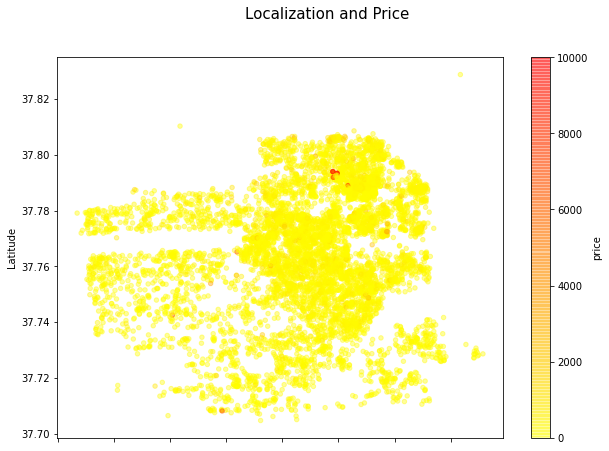

In [13]:
rentals.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4,
             c="price",figsize=(10,7), cmap=plt.get_cmap("autumn_r"),colorbar=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.suptitle("Localization and Price",fontsize=15)

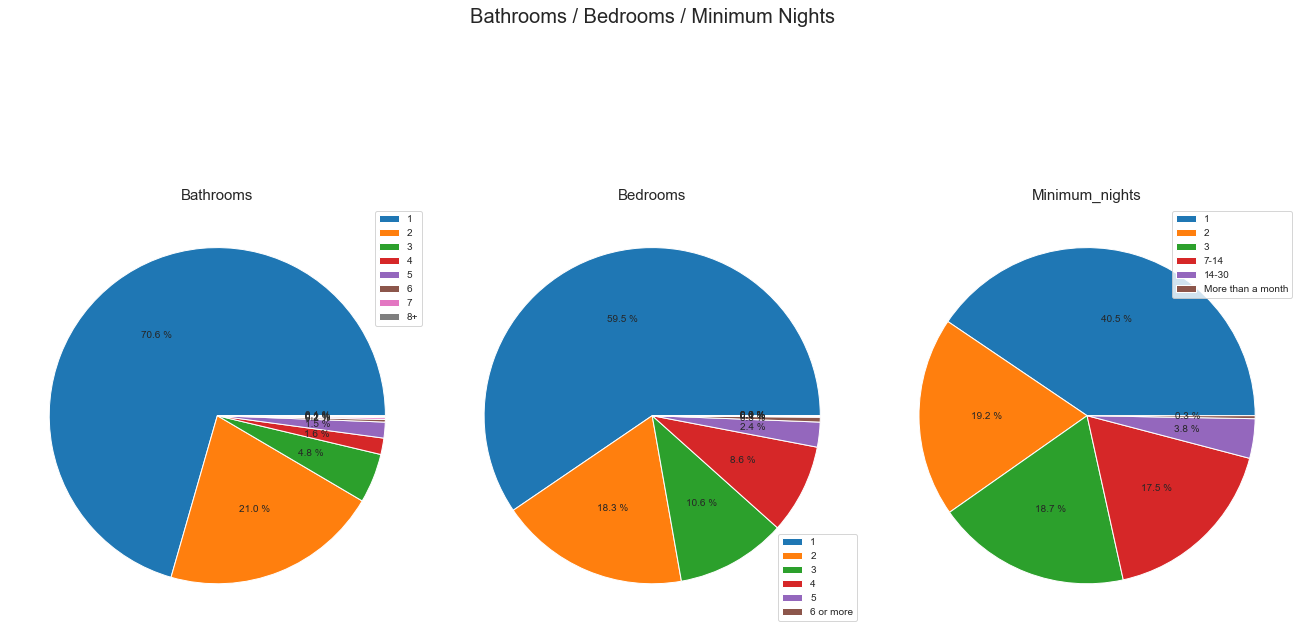

In [14]:
#Select Style

sns.set_style("whitegrid")

#Select Variable

a=rentals['bathrooms'].value_counts()
b=rentals['bedrooms'].value_counts()
c=rentals['minimum_nights'].value_counts()

# Create a Figure and an array of subplots with 2 rows and 2 columns
figg = plt.figure(figsize=(18,11),constrained_layout=True)
ax = figg.subplots(1,3)

figg.suptitle('Bathrooms / Bedrooms / Minimum Nights' ,fontsize=20)

def PlotPie (ax, data, title):
    ax.pie(data ,autopct="%0.1f %%")
    ax.set_title(title,fontsize=15)
    #ax.legend(legend,loc="best")

PlotPie (ax[0], a, "Bathrooms")
ax[0].legend([1,2,3,4,5,6,7,"8+"])
PlotPie (ax[1], b, "Bedrooms")#[1,2,3,4,5,"5+"])
ax[1].legend([1,2,3,4,5, "6 or more"])
PlotPie (ax[2], c, "Minimum_nights")#[1,2,3,7,14,30,60,90,180,365])
ax[2].legend([1,2,3,"7-14","14-30","More than a month"],loc="upper right")


plt.show()

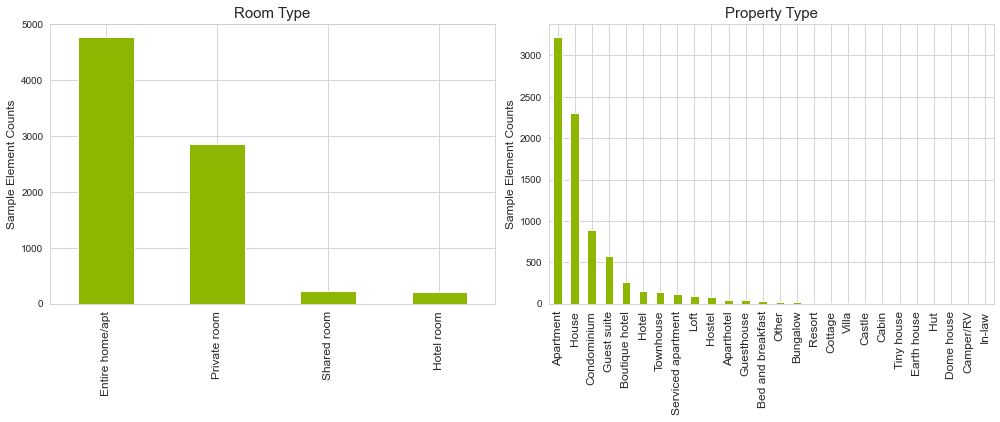

In [15]:
plt.subplot(2,2, 1)

rentals['room_type'].value_counts().loc[['Entire home/apt','Private room','Shared room','Hotel room']].plot.bar(figsize=(10,10), color='#8DB600')
plt.title("Room Type",fontsize=15)
plt.ylabel("Sample Element Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=12)

plt.subplot(2, 2, 2)

rentals['property_type'].value_counts().plot.bar(figsize=(14,10), color='#8DB600')
plt.title("Property Type",fontsize=15)
plt.ylabel("Sample Element Counts", fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks()

plt.tight_layout()

##### Correlations

In [16]:
corr_matrix= rentals.corr()
corr_matrix['price'].sort_values(ascending=False)

price             1.000000
bedrooms          0.261860
bathrooms         0.092592
latitude          0.084801
id                0.018314
longitude         0.016684
minimum_nights   -0.077315
Name: price, dtype: float64

In [17]:
corr_matrix.style.background_gradient(cmap='RdBu_r', axis=None, vmin=-1, vmax=1).set_precision(3)

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
id,1.000,0.035,0.048,0.032,-0.068,0.054,0.018
latitude,0.035,1.000,0.184,0.077,-0.108,0.176,0.085
longitude,0.048,0.184,1.000,-0.002,-0.115,0.115,0.017
bathrooms,0.032,0.077,-0.002,1.000,0.353,0.023,0.093
bedrooms,-0.068,-0.108,-0.115,0.353,1.000,-0.041,0.262
minimum_nights,0.054,0.176,0.115,0.023,-0.041,1.000,-0.077
price,0.018,0.085,0.017,0.093,0.262,-0.077,1.000


##### Exploratory Data Analysis Summary
____

##### Model Developement
___

##### Data Encoder

In [18]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder= OrdinalEncoder()
rentals[['property_type','room_type']] = ordinal_encoder.fit_transform(rentals[['property_type','room_type']])

##### Train Test Split

In [21]:
## Split Test Set in order to Avoid Snooping Bias

train_set, test_set = train_test_split (rentals, test_size=0.15, random_state=40)

print("train set shape: ",train_set.shape)
print("test set shape: ",test_set.shape)


###TRAIN SET

rentals_train = train_set.copy()

#### TEST SET

rentals_test = test_set.copy()

train set shape:  (6848, 9)
test set shape:  (1209, 9)


##### Target Variable

In [22]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [23]:
#########DECLARING TARGET VARIABLES

#SPLIT ENCODED TRAINING SET

y_train = rentals_train['price']
x_train = rentals_train.drop(['price'], axis=1)

#SPLIT ENCODED TEST SET
y_test = rentals_test['price']
x_test = rentals_test.drop(['price'], axis=1)

#### XGBOOST Model

##### What is XGBOOST?

XGBoost is the leading model for working with standard tabular data (the type of data you store in Pandas DataFrames, as opposed to more exotic types of data like images and videos). XGBoost models dominate many Kaggle competitions.

To reach peak accuracy, XGBoost models require more knowledge and model tuning than techniques like Random Forest. After this tutorial, you'ill be able to

Follow the full modeling workflow with XGBoost
Fine-tune XGBoost models for optimal performance
XGBoost is an implementation of the Gradient Boosted Decision Trees algorithm (scikit-learn has another version of this algorithm, but XGBoost has some technical advantages.) 

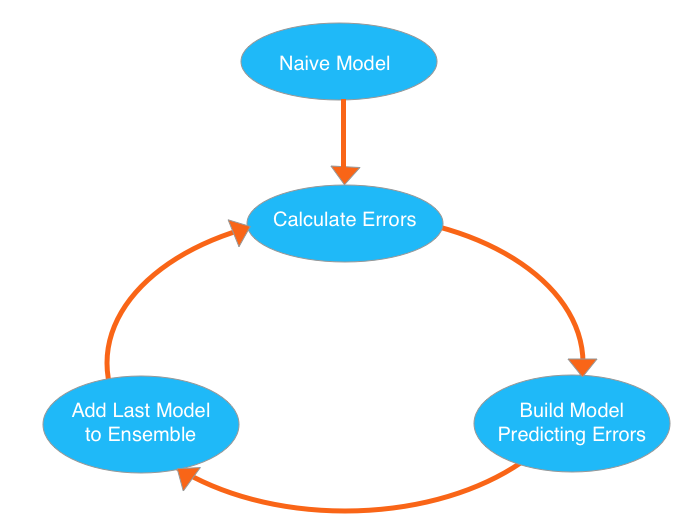

We go through cycles that repeatedly builds new models and combines them into an ensemble model. We start the cycle by calculating the errors for each observation in the dataset. We then build a new model to predict those. We add predictions from this error-predicting model to the "ensemble of models."

In [24]:
import xgboost as xgb


dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

print(f'Número de datos para entrenamiento: {len(x_train)}')
print(f'Número de datos para test: {len(x_test)}')

Número de datos para entrenamiento: 6848
Número de datos para test: 1209


In [25]:
from xgboost import XGBRegressor

model = XGBRegressor(learning_rate=0.05)
# Add silent=True to avoid printing out updates with each cycle
model.fit(x_train, y_train, verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

##### Evaluation

In [26]:
# make predictions
predictions = model.predict(x_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 88.54405126264018


In [27]:
results = pd.DataFrame(predictions - y_test)
results.drop(results[results['price']<-25].index, inplace=True)
results

,price
353,9.787720
1256,38.842545
7391,18.115967
6576,3.576981
852,31.865234
...,...
8047,41.095474
7752,7.363564
4085,178.006195
5272,-4.157440


##### Results

In [28]:
y = rentals_train['price']
X = rentals_train.drop(['price'], axis=1)

model.fit(X, y, verbose=True)
predictions = model.predict(X)

In [29]:
final_results = pd.DataFrame(predictions - y)
final_results.drop(final_results[final_results['price']<-25].index, inplace=True)

In [30]:
print("Rentals model prediction (Over 25 dollars off) per night")
final_results.drop

Rentals model prediction (Over 25 dollars off) per night


<bound method DataFrame.drop of           price
1345  75.662582
55    -0.441078
7796  44.238159
2854  57.609543
2471  35.317101
...         ...
7659   8.888954
3099   1.232986
6356  21.738251
6411 -19.100616
3439  77.778809

[5305 rows x 1 columns]>

In [32]:
final_results.describe()

,price
count,5305.000000
mean,40.251095
std,49.047958
min,-24.994751
25%,9.390518
50%,30.446091
75%,56.798965
max,643.818542


Text(0, 0.5, 'Usuaries count')

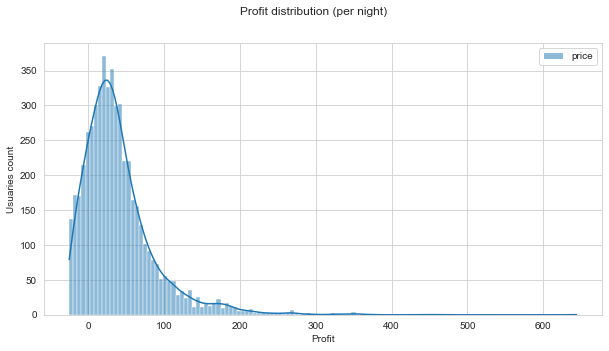

In [47]:
plt.subplots(figsize=(10,5))
sns.histplot(final_results, kde=True)
plt.suptitle("Profit distribution (per night)")
plt.xlabel("Profit")
plt.ylabel("Usuaries count")

##### Conclussions
___

- 5305 usuarios de los 8111 estudiados cumplen las condiciones necesarias para aparecer en la tabla de resultados

- La media de beneficio es 40 dolares la noche, encontrándose el valor mínimo en -24.99, y el máximo en 643.

##### References
___

Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow : concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: O'Reilly Media. ISBN: 978-1491962299
